In [60]:
import geopandas
import pathlib
import shapely
import random

## Functions

In [105]:
def trace_selected_upstream(network, debug: bool = False):
    selected_segments = network["selected"].sum()
    if debug:
        print(f"Selected segments = {selected_segments}")
    for index in range(len(network)):
        network.loc[network["to_node"].isin(network[network["selected"]]["from_node"]), "selected"] = True
        if network["selected"].sum() == selected_segments:
            break
        selected_segments = network["selected"].sum()
        if debug:
            print(f"Selected segments = {selected_segments}")

## Load in REC1 & thin to rivers above threshold
* Define the 
* Keep rivers over 100m3 and upstream sections above this

In [107]:
rec_path = pathlib.Path(r"C:\Local\data\river_bathemetry\rec1_flow_and_friction.geojson")
output_path = pathlib.Path(r"C:\Local\data\catchments\Cylc\rivers")
rec = geopandas.read_file(rec_path)
rec["terminal"] = rec["to_node"].isin(rec["from_node"])==False

flow_threshold = 100

In [108]:
big = rec[rec["flow"] > flow_threshold]
print(f"The number of river terminals with a flow greater than 100m3 is {len(big[big['terminal']])}")

big_file = (output_path / "rec1_flow_and_friction_big_rivers_100m3.geojson")
if not big_file.exists():
    big.to_file(big_file)

The number of river terminals with a flow greater than 100m3 is 284


[array([[<Axes: title={'center': 'flow'}>]], dtype=object),
 <Axes: xlabel='flow', ylabel='n'>]

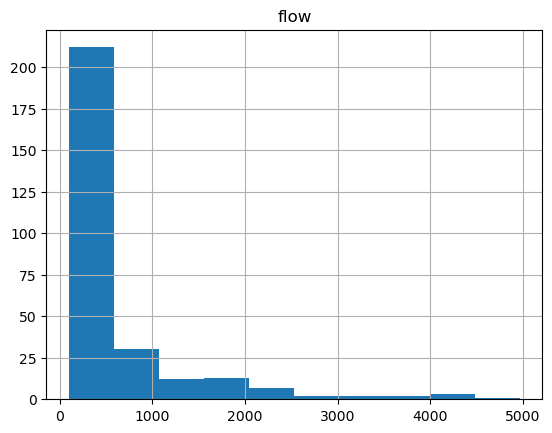

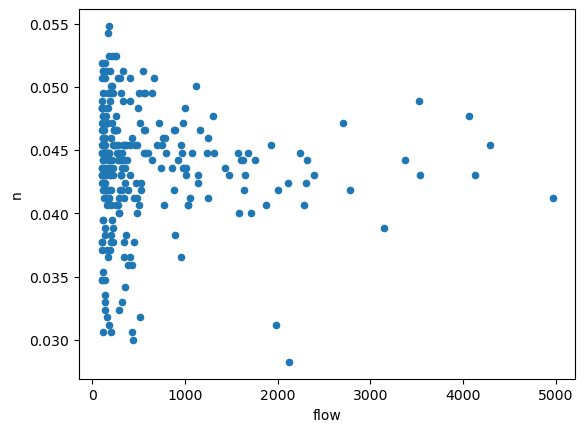

In [109]:
[big[big['terminal']][['flow']].hist(), big[big['terminal']].plot(kind="scatter", x="flow", y="n")]

### Select the terminals of 20 rivers
* 5 biggest
* 15 randomly selected

In [110]:
big["selected"]=False

C:\Users\pearsonra\Anaconda3\envs\raster\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [113]:
big.loc[big["terminal"] & (big["flow"] > big[big['terminal']]["flow"].sort_values(ascending=False).iloc[5]), "selected"] = True
trace_selected_upstream(big)
file_name = output_path / "rec1_flow_and_friction_5_largest.geojson"
if not file_name.exists():
    big[big["selected"]].to_file(file_name)

In [114]:
indices = big[big["terminal"] & (big["selected"] == False)].index
big.loc[indices[random.sample(range(0, len(indices)), 15)], "selected"] = True
trace_selected_upstream(big)
file_name = output_path / "rec1_flow_and_friction_20_initial.geojson"
if not file_name.exists():
    big[big["selected"]].to_file(file_name)

In [122]:
print(f"The twenty selected rivers to examine have the terminal NZREACH id's of: {list(big[big['selected'] & big['terminal']]['NZREACH'])}")

The twenty selected rivers to examine have the terminal NZREACH id's of: [3002120, 5000484, 7043705, 8015584, 10000724, 10006407, 11011388, 12008808, 12009639, 12011918, 12013344, 12025637, 12027924, 12050778, 12053421, 13058454, 15000104, 15000831, 15026787, 15054970]


## Select all upstream catchments

<Axes: >

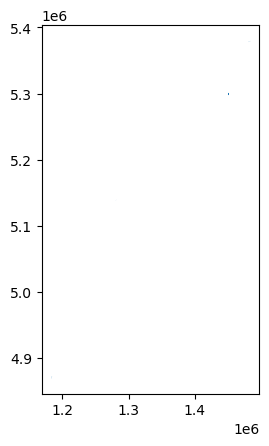

In [100]:
big[big["selected"]].plot()

In [101]:
selected_segments = big["selected"].sum()
#print(f"Selected segments = {selected_segments}")
for index in range(len(big)):
    big.loc[big["to_node"].isin(big[big["selected"]]["from_node"]), "selected"] = True
    if big["selected"].sum() == selected_segments:
        break
    selected_segments = big["selected"].sum()
    #print(f"Selected segments = {selected_segments}")

In [102]:
big["selected"].sum()

5297

In [88]:
big[big[ "selected"]]

,NZREACH,CATCHAREA,to_node,from_node,n,flow,geometry,terminal,selected
2658,1002745,3.670686e+08,1003054,1003078,0.03239,286.160012,"LINESTRING (1624019.194 6124534.511, 1624019.1...",True,True
6953,1007073,6.464215e+07,1007571,1007553,0.04242,103.476667,"LINESTRING (1618694.434 6098493.992, 1618664.5...",True,True
7534,1007662,3.014189e+08,1008200,1008190,0.04655,244.995337,"LINESTRING (1695465.780 6095640.541, 1695495.7...",True,True
29145,2001770,9.685044e+07,2001999,2001941,0.03357,136.955984,"LINESTRING (1750184.956 5970168.138, 1750215.0...",True,True
66686,3030336,3.643371e+08,3030927,3030886,0.04360,193.631378,"LINESTRING (1750095.512 5758876.236, 1750065.5...",True,True
87880,4002050,1.197981e+09,4028820,4002221,0.03003,435.290191,"LINESTRING (1899654.274 5816236.926, 1899684.3...",True,True
140912,6012770,1.462846e+08,6013044,6012942,0.04832,107.440126,"LINESTRING (1691480.815 5620316.367, 1691450.8...",True,True
216121,8021954,2.673360e+08,8022048,8022082,0.04183,132.595865,"LINESTRING (1934093.347 5631681.644, 1934123.3...",True,True
266695,11016624,3.581880e+09,11017550,11017559,0.04183,1634.331225,"LINESTRING (1686067.256 5411919.590, 1686097.2...",True,True
282019,12001530,7.066778e+07,12001560,12001568,0.04950,313.027248,"LINESTRING (1524743.400 5448816.337, 1524713.4...",True,True


In [103]:
file_name = pathlib.Path(r"C:\Local\data\catchments\Cylc\rivers\rec1_flow_and_friction_5_largest.geojson")
big[big[ "selected"]].to_file(file_name)

TypeError: unhashable type: 'Int64Index'

Int64Index([232751, 266695, 290104, 479566, 392935, 324455, 354821, 301028,
            322166,   2686, 402696, 514247, 535783, 283693,   7482],
           dtype='int64')

In [59]:
indices[[1,4,5]]

Int64Index([2686, 6175, 6720], dtype='int64')

In [50]:
big.loc[[290105,333604], "selected"]

290105    True
333604    True
Name: selected, dtype: bool

In [6]:
#rec[rec["CATCHAREA"] > 100000000].to_file(r"C:\Local\data\catchments\Cylc\rivers\rec1_flow_and_friction_big_rivers_100000000.geojson")